### Check if the distribution is matched correclty.

1) Plot the longitudinal phase space. If the distribution is matched there should be no filamentation.

2) Plot the rms bunch length and the momentum spreas over turns. In case of a perfectly matched beam these values should be constant.

3) In the presence of the CC plot the induced closed orbit at different turns. If the beam is matched the shape shouldn't change.

In [1]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Plotting parameters
params = {'legend.fontsize': 25,
          'figure.figsize': (12.5, 10.5),
          'axes.labelsize': 25,
          'axes.titlesize': 25,
          'xtick.labelsize': 25,
          'ytick.labelsize': 25,
          'image.cmap': 'jet',
          'lines.linewidth': 1,
          'lines.markersize': 8,
          'font.family': 'sans-serif'}

plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update(params)

#### Load the tbt data from the simulation


In [30]:
df =  pd.read_pickle('/afs/cern.ch/work/n/natriant/private/pysixtrack_example_crabcavity/output/tbt.pkl') 
df_2 =  pd.read_pickle('/afs/cern.ch/work/n/natriant/private/pysixtrack_example_crabcavity/output/tbt_1000particles_1000turns_.noCCpkl') 

In [31]:
np.std(df['sigma'][0]) # initial rms bunch length

0.16513416198164935

#### 1. Plot longitudinal phase space

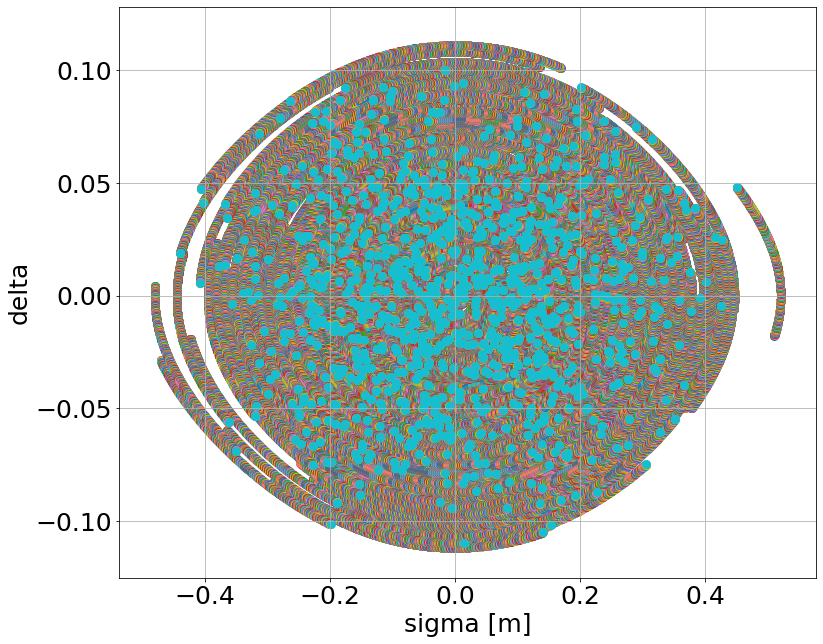

In [33]:
turns_list = np.arange(0,1000)
for turn in turns_list:
    plt.scatter(df['sigma'][turn], np.array(df['delta'][turn])*1e3)
plt.xlabel('sigma [m]')
plt.ylabel('delta')
plt.grid()
#plt.savefig('phase_space_noCC.png')

#### 2. Plot rms bunch length and momentum spread over turns

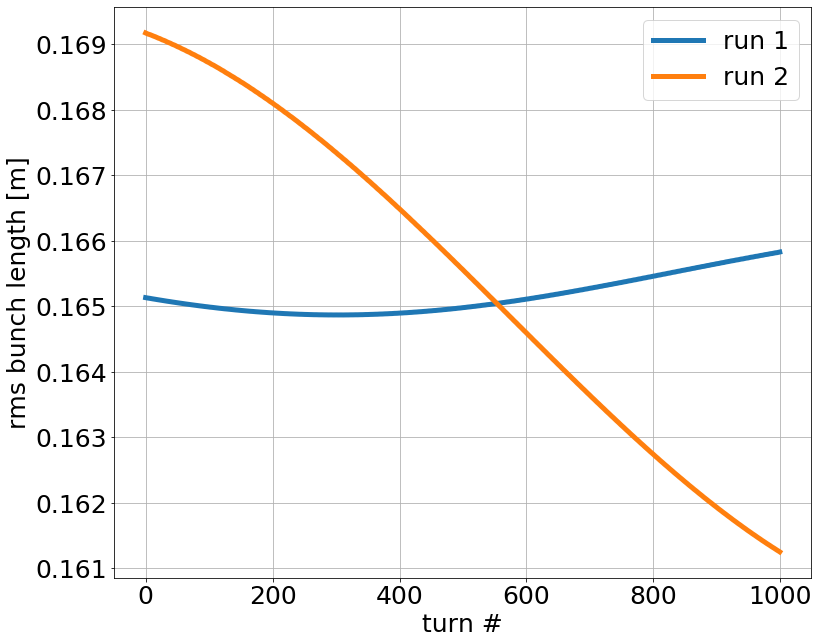

In [34]:
turns_list = np.arange(0,1000)
rms_bunch_length = []
rms_bunch_length_2 = []

for turn in turns_list:    
    rms_bunch_length.append(np.std(df['sigma'][turn]))
    rms_bunch_length_2.append(np.std(df_2['sigma'][turn]))

plt.plot(turns_list, rms_bunch_length, linewidth=5, label = 'run 1')
plt.plot(turns_list, rms_bunch_length_2,  linewidth=5, label = 'run 2')
plt.xlabel('turn #')
plt.ylabel('rms bunch length [m]')
plt.grid()
plt.legend()
#plt.savefig('rms_bunch_length_noCC_2_runs.png')

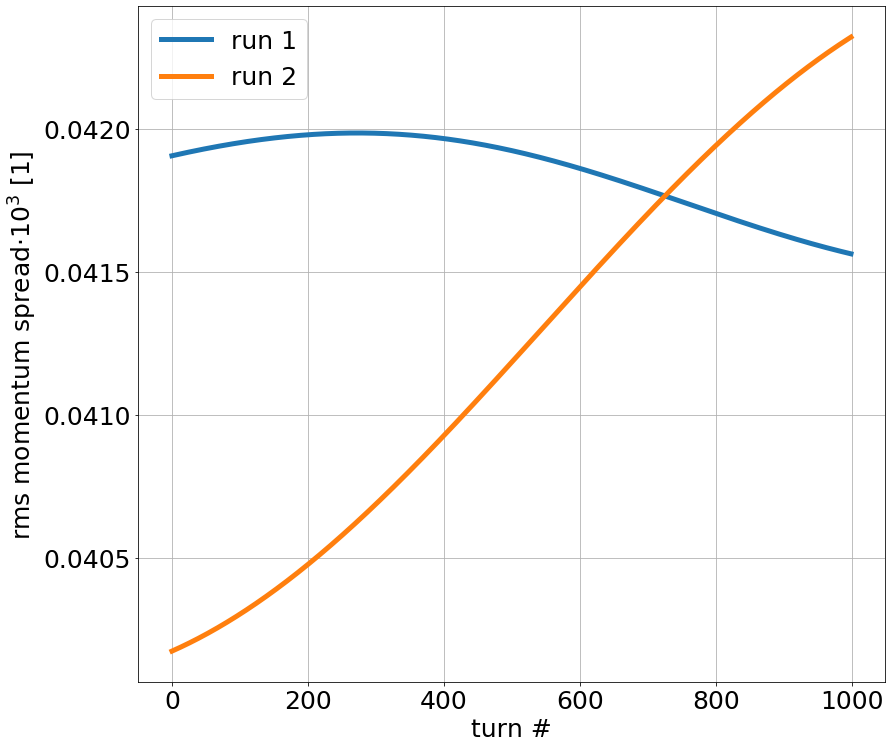

In [35]:
rms_momentum_spread = []
rms_momentum_spread_2 = []
for turn in turns_list:    
    rms_momentum_spread.append(np.std(df['delta'][turn]))
    rms_momentum_spread_2.append(np.std(df_2['delta'][turn]))

plt.plot(turns_list, np.array(rms_momentum_spread)*1e3,  linewidth=5, label = 'run 1')
plt.plot(turns_list, np.array(rms_momentum_spread_2)*1e3,  linewidth=5, label = 'run 2')
plt.xlabel('turn #')
plt.ylabel('rms momentum spread'+ r'$\cdot 10^3$' +' [1]')
plt.grid()
plt.legend()
plt.tight_layout()
#plt.savefig('rms_momentum_spread_noCC_2runs.png')